(320, 213, 3)


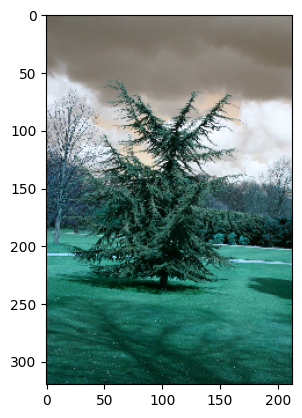

In [1]:
from skimage import data, segmentation, color
from skimage import graph
from matplotlib import pyplot as plt
from imutils import paths
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

imagepaths = list(paths.list_images("/Users/dylan/Desktop/MSRC_ObjCategImageDatabase_v1"))

image = imagepaths[122]
#load and display 
img = cv2.imread(image)
h,w = img.shape[:2]
print(img.shape)
plt.imshow(img)
plt.show()



(320, 213, 3)


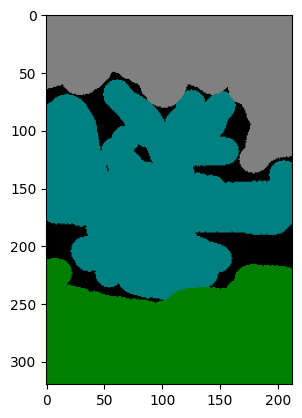

In [2]:
imagetruth = "/Users/dylan/Desktop/MSRC_ObjCategImageDatabase_v1/2_5_s_GT.bmp"
#load and display 
imagetruth = cv2.imread(imagetruth)
h,w = imagetruth.shape[:2]
print(imagetruth.shape)
plt.imshow(imagetruth)
plt.show()

# Simple Linear Iterative Clustering

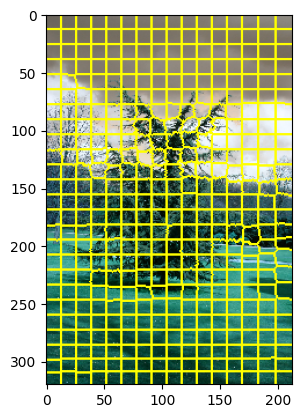

In [7]:
labels1 = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
fig = plt.figure("Superpixels")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img, labels1))

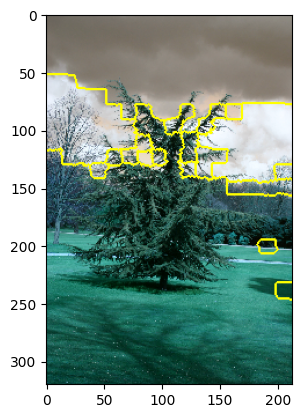

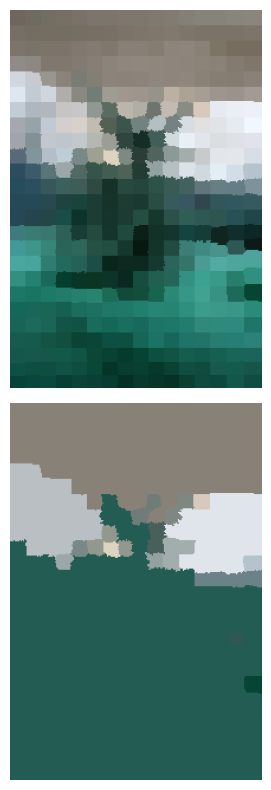

In [8]:
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0) #output after ncut

plt.imshow(mark_boundaries(img, labels2))

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

# MSE, SSIM

In [5]:
# Test for same image
error = mse(imagetruth, imagetruth)
print("MSE:", error)

s = ssim(imagetruth,imagetruth,channel_axis=2)
print("Similarity:",s)

MSE: 0.0
Similarity: 1.0


In [6]:
error = mse(imagetruth, out2)
print("MSE:", error)

s = ssim(imagetruth,out2,channel_axis=2)
print("Similarity:",s)

MSE: 5501.923444835681
Similarity: 0.42409313423891676


# Test with different image

(320, 213, 3)


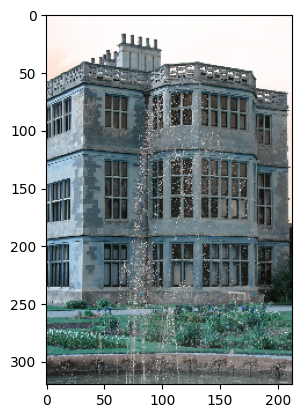

In [7]:
p = "/Users/dylan/Desktop/MSRC_ObjCategImageDatabase_v1/3_2_s.bmp"
#load and display 
p = cv2.imread(p)
h,w = p.shape[:2]
print(p.shape)
plt.imshow(p)
plt.show()

In [8]:
error = mse(p, out2)
print("MSE:", error)

s = ssim(p,out2,channel_axis=2)
print("Similarity:",s)

MSE: 6347.577851134585
Similarity: 0.1517677760171464


# Computing the metrics for all the images in the dataset

In [2]:
from skimage import data, segmentation, color
from skimage import graph
from matplotlib import pyplot as plt
from imutils import paths
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

imagepaths = list(paths.list_images("/Users/dylan/Desktop/MSRC_ObjCategImageDatabase_v1"))

originalimages = []
semanticimages = []

#Separate the originals from the semantic ones
for s in imagepaths:
    substring = 'GT'
    if substring in s:
        semanticimages.append(s)
    else:
        originalimages.append(s)

#Divide all 8 classes
c1 = []
c2 = []
c3 = []
c4 = []
c5 = []
c6 = []
c7 = []
c8 = []
c1GT = []
c2GT = []
c3GT = []
c4GT = []
c5GT = []
c6GT = []
c7GT = []
c8GT = []

sub = '/Users/dylan/Desktop/MSRC_ObjCategImageDatabase_v1/' 
#ss = sub1.replace(sub,'')

for c in range(len(originalimages)):
    s = originalimages[c]
    new = s.replace(sub,'')
    if(new.startswith('1')):
        c1.append(sub+new)
    if(new.startswith('2')):
        c2.append(sub+new)
    if(new.startswith('3')):
        c3.append(sub+new)
    if(new.startswith('4')):
        c4.append(sub+new)
    if(new.startswith('5')):
        c5.append(sub+new)
    if(new.startswith('6')):
        c6.append(sub+new)
    if(new.startswith('7')):
        c7.append(sub+new)
    if(new.startswith('8')):
        c8.append(sub+new)
    
for c in range(len(semanticimages)):
    s = semanticimages[c]
    new = s.replace(sub,'')
    if(new.startswith('1')):
        c1GT.append(sub+new)
    if(new.startswith('2')):
        c2GT.append(sub+new)
    if(new.startswith('3')):
        c3GT.append(sub+new)
    if(new.startswith('4')):
        c4GT.append(sub+new)
    if(new.startswith('5')):
        c5GT.append(sub+new)
    if(new.startswith('6')):
        c6GT.append(sub+new)
    if(new.startswith('7')):
        c7GT.append(sub+new)
    if(new.startswith('8')):
        c8GT.append(sub+new)
    


# Sort array

In [3]:
c1.sort()
c1GT.sort()
c2.sort()
c2GT.sort()
c3.sort()
c3GT.sort()
c4.sort()
c4GT.sort()
c5.sort()
c5GT.sort()
c6.sort()
c6GT.sort()
c7.sort()
c7GT.sort()
c8.sort()
c8GT.sort()

# Apply filter for each class

In [37]:
tabella1 = []
tabella2 = []
tabc1MSE = []
tabc1SSIM = [] 
for i in range(len(c1)):
    img = cv2.imread(c1[i])
    imagetruth = cv2.imread(c1GT[i])
    labels1 = segmentation.slic(img, compactness=50, n_segments=700, start_label=1)
    out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
    g = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g)
    out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0) #output after ncut
    # MSE
    error = mse(imagetruth, out2)
    #rint("MSE:", error)
    # SSIM
    s = ssim(imagetruth,out2,channel_axis=2)
    #print("Similarity:",s)
    tabc1MSE.append(error)
    tabc1SSIM.append(s)
    tabella1.append(imagetruth)
    tabella2.append(out2)


# AVG of SSIM

In [12]:
np.average(tabc1SSIM)

0.2662747661569183

# Save into csv file

In [13]:
import csv

fields = ['Image n.', 'MSE', 'SSIM']
filename = "Class1_MSE_SSIM.csv"
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    
    # writing the fields 
    csvwriter.writerow(fields)
    
    for i in range(len(tabc1MSE)):
        row = [[i,tabc1MSE[i],tabc1SSIM[i]]]
        csvwriter.writerows(row)

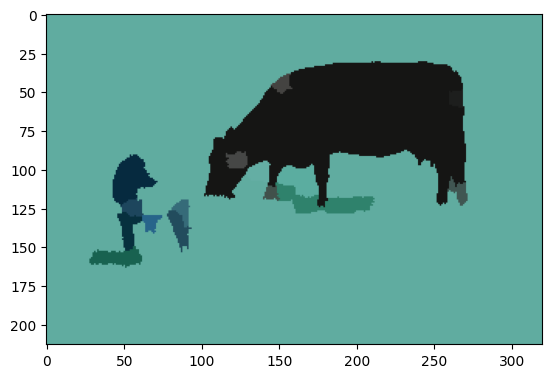

In [44]:
plt.imshow(tabella2[2])

# Class 2

In [96]:
tabella1 = []
tabella2 = []
tabc2MSE = []
tabc2SSIM = [] 
for i in range(len(c2)):
    img = cv2.imread(c2[i])
    imagetruth = cv2.imread(c2GT[i])
    labels1 = segmentation.slic(img, compactness=50, n_segments=700, start_label=1)
    out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
    g = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g)
    out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0) #output after ncut
    # MSE
    error = mse(imagetruth, out2)
    #rint("MSE:", error)
    # SSIM
    s = ssim(imagetruth,out2,channel_axis=2)
    #print("Similarity:",s)
    tabc2MSE.append(error)
    tabc2SSIM.append(s)
    tabella1.append(imagetruth)
    tabella2.append(out2)
    
print(np.average(tabc2SSIM))

import csv

fields = ['Image n.', 'MSE', 'SSIM']
filename = "Class2_MSE_SSIM.csv"
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    
    # writing the fields 
    csvwriter.writerow(fields)
    for i in range(len(tabc2MSE)):
        row = [[i,tabc2MSE[i],tabc2SSIM[i]]]
        csvwriter.writerows(row)

0.4076094862038246


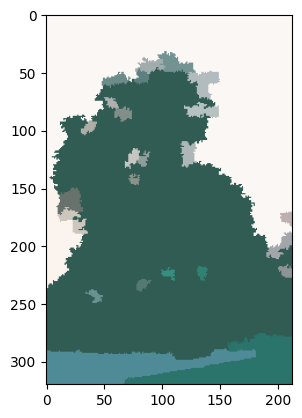

In [105]:
plt.imshow(tabella2[27])

# Class 3

In [180]:
tabella1 = []
tabella2 = []
tabc3MSE = []
tabc3SSIM = [] 
for i in range(len(c3)):
    img = cv2.imread(c3[i])
    imagetruth = cv2.imread(c3GT[i])
    labels1 = segmentation.slic(img, compactness=17, n_segments=400, start_label=1)
    out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
    g = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g)
    out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0) #output after ncut
    # MSE
    error = mse(imagetruth, out2)
    #rint("MSE:", error)
    # SSIM
    s = ssim(imagetruth,out2,channel_axis=2)
    #print("Similarity:",s)
    tabc3MSE.append(error)
    tabc3SSIM.append(s)
    tabella1.append(imagetruth)
    tabella2.append(out2)
    
print(np.average(tabc3SSIM))

import csv

fields = ['Image n.', 'MSE', 'SSIM']
filename = "Class3_MSE_SSIM.csv"
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    
    # writing the fields 
    csvwriter.writerow(fields)
    for i in range(len(tabc3MSE)):
        row = [[i,tabc3MSE[i],tabc3SSIM[i]]]
        csvwriter.writerows(row)

0.2994717618714943


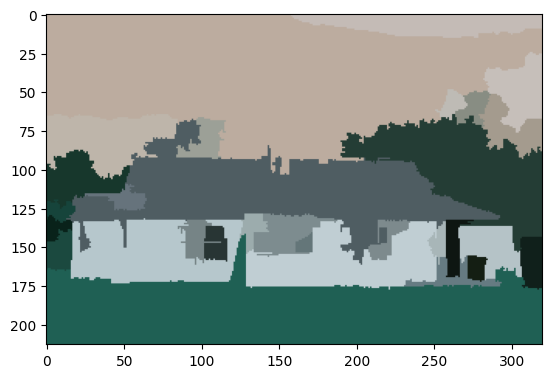

In [181]:
plt.imshow(tabella2[23])

# Class 4

In [75]:
tabella1 = []
tabella2 = []
tabc4MSE = []
tabc4SSIM = [] 
for i in range(len(c4)):
    img = cv2.imread(c4[i])
    imagetruth = cv2.imread(c4GT[i])
    labels1 = segmentation.slic(img, compactness=20, n_segments=500, start_label=1)
    out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
    g = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g)
    out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0) #output after ncut
    # MSE
    error = mse(imagetruth, out2)
    #rint("MSE:", error)
    # SSIM
    s = ssim(imagetruth,out2,channel_axis=2)
    #print("Similarity:",s)
    tabc4MSE.append(error)
    tabc4SSIM.append(s)
    tabella1.append(imagetruth)
    tabella2.append(out2)
    
print(np.average(tabc4SSIM))

import csv

fields = ['Image n.', 'MSE', 'SSIM']
filename = "Class4_MSE_SSIM.csv"
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    
    # writing the fields 
    csvwriter.writerow(fields)
    for i in range(len(tabc4MSE)):
        row = [[i,tabc4MSE[i],tabc4SSIM[i]]]
        csvwriter.writerows(row)

0.3749348089661285


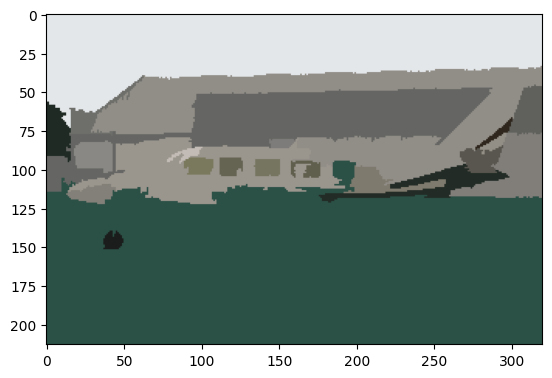

In [80]:
plt.imshow(tabella2[9])

# Class 5

In [74]:
tabella1 = []
tabella2 = []
tabc5MSE = []
tabc5SSIM = [] 
for i in range(len(c5)):
    img = cv2.imread(c5[i])
    imagetruth = cv2.imread(c5GT[i])
    labels1 = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
    out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
    g = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g)
    out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0) #output after ncut
    # MSE
    error = mse(imagetruth, out2)
    #rint("MSE:", error)
    # SSIM
    s = ssim(imagetruth,out2,channel_axis=2)
    #print("Similarity:",s)
    tabc5MSE.append(error)
    tabc5SSIM.append(s)
    tabella1.append(imagetruth)
    tabella2.append(out2)
    
print(np.average(tabc5SSIM))

import csv

fields = ['Image n.', 'MSE', 'SSIM']
filename = "Class5_MSE_SSIM.csv"
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    
    # writing the fields 
    csvwriter.writerow(fields)
    for i in range(len(tabc5MSE)):
        row = [[i,tabc5MSE[i],tabc5SSIM[i]]]
        csvwriter.writerows(row)

0.21481439761566873


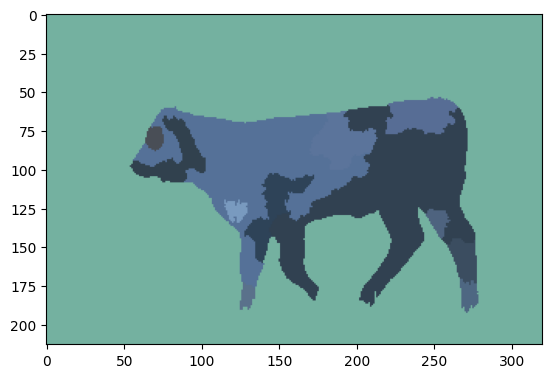

In [95]:
plt.imshow(tabella2[20])

# Class 6

In [7]:
tabella1 = []
tabella2 = []
tabc6MSE = []
tabc6SSIM = [] 
for i in range(len(c6)):
    img = cv2.imread(c6[i])
    imagetruth = cv2.imread(c6GT[i])
    labels1 = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
    out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
    g = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g)
    out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0) #output after ncut
    # MSE
    error = mse(imagetruth, out2)
    #rint("MSE:", error)
    # SSIM
    s = ssim(imagetruth,out2,channel_axis=2)
    #print("Similarity:",s)
    tabc6MSE.append(error)
    tabc6SSIM.append(s)
    tabella1.append(imagetruth)
    tabella2.append(out2)
    
    
print(np.average(tabc6SSIM))

import csv

fields = ['Image n.', 'MSE', 'SSIM']
filename = "Class6_MSE_SSIM.csv"
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    
    # writing the fields 
    csvwriter.writerow(fields)
    for i in range(len(tabc6MSE)):
        row = [[i,tabc6MSE[i],tabc6SSIM[i]]]
        csvwriter.writerows(row)

0.09482728073121864


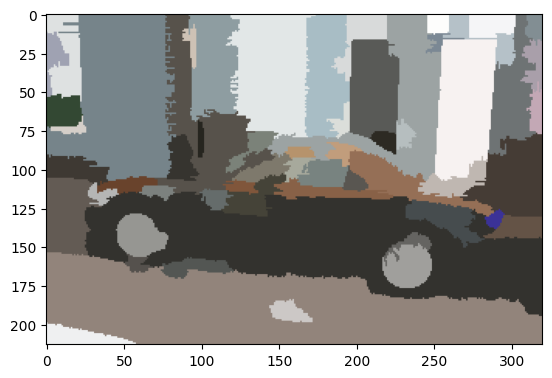

In [46]:
plt.imshow(tabella2[21])

In [ ]:
for k in range(100,500,100):
    tabella1 = []
    tabella2 = []
    tabc7MSE = []
    tabc7SSIM = [] 
    for i in range(len(c7)):
        img = cv2.imread(c7[i])
        imagetruth = cv2.imread(c7GT[i])
        labels1 = segmentation.slic(img, compactness=30, n_segments=k, start_label=1)
        out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
        g = graph.rag_mean_color(img, labels1, mode='similarity')
        labels2 = graph.cut_normalized(labels1, g)
        out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0) #output after ncut
        # MSE
        error = mse(imagetruth, out2)
        # SSIM
        s = ssim(imagetruth,out2,channel_axis=2)
        #print("Similarity:",s)
        tabc7MSE.append(error)
        tabc7SSIM.append(s)
        tabella1.append(imagetruth)
        tabella2.append(out2)
    
        print(np.average(tabc7SSIM))


# Class 7

In [44]:
tabella1 = []
tabella2 = []
tabc7MSE = []
tabc7SSIM = [] 
for i in range(len(c7)):
    img = cv2.imread(c7[i])
    imagetruth = cv2.imread(c7GT[i])
    labels1 = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
    out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
    g = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g)
    out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0) #output after ncut
    # MSE
    error = mse(imagetruth, out2)
    #rint("MSE:", error)
    # SSIM
    s = ssim(imagetruth,out2,channel_axis=2)
    #print("Similarity:",s)
    tabc7MSE.append(error)
    tabc7SSIM.append(s)
    tabella1.append(imagetruth)
    tabella2.append(out2)
    
    
print(np.average(tabc7SSIM))

import csv

fields = ['Image n.', 'MSE', 'SSIM']
filename = "Class7_MSE_SSIM.csv"
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    
    # writing the fields 
    csvwriter.writerow(fields)
    for i in range(len(tabc7MSE)):
        row = [[i,tabc7MSE[i],tabc7SSIM[i]]]
        csvwriter.writerows(row)

0.21901990260616086


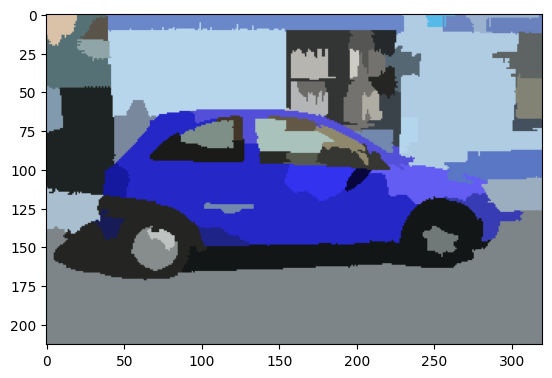

In [72]:
plt.imshow(tabella2[28])

# Class 8

In [17]:
tabella1 = []
tabella2 = []
tabc8MSE = []
tabc8SSIM = [] 
for i in range(len(c8)):
    img = cv2.imread(c8[i])
    imagetruth = cv2.imread(c8GT[i])
    labels1 = segmentation.slic(img, compactness=30, n_segments=500, start_label=1)
    out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
    g = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g)
    out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0) #output after ncut
    # MSE
    error = mse(imagetruth, out2)
    #rint("MSE:", error)
    # SSIM
    s = ssim(imagetruth,out2,channel_axis=2)
    #print("Similarity:",s)
    tabc8MSE.append(error)
    tabc8SSIM.append(s)
    tabella1.append(imagetruth)
    tabella2.append(out2)
    
    
print(np.average(tabc8SSIM))

import csv

fields = ['Image n.', 'MSE', 'SSIM']
filename = "Class8_MSE_SSIM.csv"
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    
    # writing the fields 
    csvwriter.writerow(fields)
    for i in range(len(tabc8MSE)):
        row = [[i,tabc8MSE[i],tabc8SSIM[i]]]
        csvwriter.writerows(row)

0.10392034323992481


# See images 

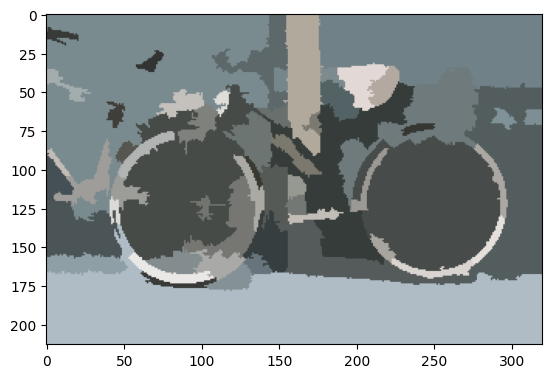

In [18]:
plt.imshow(tabella2[0])